## Problem Statement

 How can Credable finance maximize its profit by upselling its loan and product upgrades

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import seaborn as sns

In [78]:
#getting the data on the notebook
df = pd.read_csv("C:/Users/wwaswa/Desktop/Python Data/DummySales.csv")

In [137]:
df.head()

,End_of_Month,units sold,Year,Month_Num,Month_Str
0,2019-01-31,10000,2019,1,Jan
1,2019-02-28,10200,2019,2,Feb
2,2019-03-31,10404,2019,3,Mar
3,2019-04-30,10612,2019,4,Apr
4,2019-05-31,10824,2019,5,May


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   End_of_Month  60 non-null     datetime64[ns]
 1   units sold    60 non-null     int32         
 2   Year          60 non-null     int32         
 3   Month_Num     60 non-null     int32         
 4   Month_Str     60 non-null     object        
dtypes: datetime64[ns](1), int32(3), object(1)
memory usage: 1.8+ KB


In [139]:
df.describe()

,End_of_Month,units sold,Year,Month_Num
count,60,60.000000,60.000000,60.000000
mean,2021-07-15 16:48:00,19008.566667,2021.000000,6.500000
min,2019-01-31 00:00:00,10000.000000,2019.000000,1.000000
25%,2020-04-22 12:00:00,13393.000000,2020.000000,3.750000
50%,2021-07-15 12:00:00,17936.000000,2021.000000,6.500000
75%,2022-10-07 18:00:00,24020.500000,2022.000000,9.250000
max,2023-12-31 00:00:00,32167.000000,2023.000000,12.000000
std,NaN,6498.493800,1.426148,3.481184


In [107]:
#type conversion
#units sold
units_sold = df['Units']


df['units sold'] = units_sold.str.replace(',', '').astype(int)

end_of_month = df['End_of_Month']

# Convert to datetime format 
df['End_of_Month'] = pd.to_datetime(end_of_month)


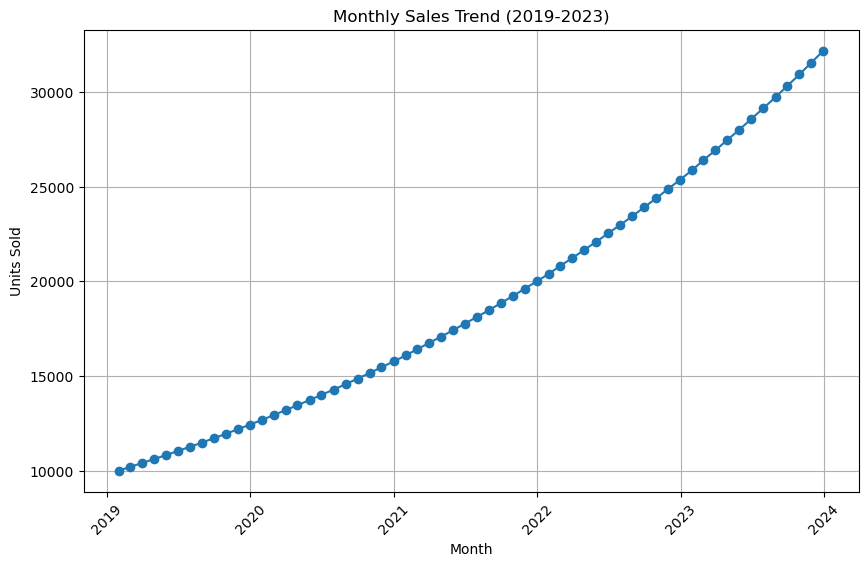

In [116]:
#Visulaizeing the data
# Visualize the monthly sales trend
plt.figure(figsize=(10, 6))
plt.plot(df['End_of_Month'], df['units sold'], marker='o', linestyle='-')
plt.title('Monthly Sales Trend (2019-2023)')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Linear Maximization problem

In [132]:
pip install pulp

Note: you may need to restart the kernel to use updated packages.Collecting pulp
  Obtaining dependency information for pulp from https://files.pythonhosted.org/packages/09/d7/57e71e11108203039c895643368c0d1a99fe719a6a80184edf240c33d25f/PuLP-2.8.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/17.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.7 MB 640.0 kB/s eta 0:00:28
   ---------------------------------------- 0.0/17.7 MB 325.1 kB/s eta 0:00:55
   ---------------------------------------- 0.0/17.7 MB 245.8 kB/s eta 0:01:12
   ---------------------------------------- 0.1/17.7 MB 326.1 kB/s eta 0:00:55
   ---------------------------------------- 0.1/17.7 MB 326.8 kB/s eta 0:00:54
   ---------------------------------------- 0.1/17.7 MB 326.8 kB/s eta 0:00:54
   ---------------------------------------- 0.1/17.7 MB 344.8 kB/s eta 0:00:51
   ------------------------------

## Problem
Find the optimal product mix
## Decision variables
1. Number of cash loans
2. Number of TV upgrades
## Constraints
1. TV upgrade loans arent eligible for upsell loans and must be purchased the day classic loan is finsihed
2. loans that have finished payments arent eligible for cash loans
3. 90% of customers are eligible for cash loan
4. Neither cash loans nor TV upgrades have any limitations on the min/max volume
5. 75% of customers who havent purchased any upsell loans are eligible for a TV upgrade
6. Neither cash loans nor TV upgrades have any limitations on the maximum volume

In [143]:
from pulp import LpMaximize, LpProblem, LpVariable

#Maximization problem
prob = LpProblem("Optimal_Product_Mix", LpMaximize)

#decision variables
cash_loans = LpVariable("Cash_Loans", lowBound=0, cat='Integer')  
tv_upgrades = LpVariable("TV_Upgrades", lowBound=0, cat='Integer')

# Define the objective function (profit to be maximized)
prob += 25 * cash_loans + 150 * tv_upgrades, "Total_Profit"

# Constraints based on the assumptions
#An assumption of 32167 has been used as the value of the maximum sales made
prob += cash_loans <= 0.9 * (32167 - tv_upgrades) 
prob += tv_upgrades <= 0.75 * (32167 - cash_loans)  
prob += cash_loans + tv_upgrades <= 32167  
# Solve the optimization problem
prob.solve()

# Print the optimal solution
print("Optimal Product Mix:")
print("Number of Cash Loans:", cash_loans.varValue)
print("Number of TV Upgrades:", tv_upgrades.varValue)

# Calculate the total profit
total_profit = 25 * cash_loans.varValue + 150 * tv_upgrades.varValue
print("Total Profit: $", total_profit)


Optimal Product Mix:
Number of Cash Loans: 0.0
Number of TV Upgrades: 24125.0
Total Profit: $ 3618750.0


## Q3. How could we potentially adjust business rules to improve profitability?

Introduce rewards such as loyalty points, and cash discounts for customers who pay before their loans matures